In [1]:
import numpy as np
import matplotlib.pyplot as plt
from climada_petals.hazard.river_flood import RiverFlood
from climada.hazard.centroids import Centroids
from climada_petals.util.constants import HAZ_DEMO_FLDDPH, HAZ_DEMO_FLDFRC

## Hazard 

In [ ]:
years = [2000]
# generating RiverFlood hazard from netCDF file
# uses centroids from Natural Earth Multipolygon for Germany and Switzerland
rf = RiverFlood.from_nc(countries = ['DEU','CHE'], years=years, dph_path=HAZ_DEMO_FLDDPH, frc_path=HAZ_DEMO_FLDFRC)
rf.event_name

In [14]:
#21.838949 	-11.745695 	51.415695 	23.145147
min_lat, max_lat, min_lon, max_lon = -11.745695 , 23.145147, 21.838949, 51.415695
cent = Centroids.from_pnt_bounds((min_lon, min_lat, max_lon, max_lat), res=0.1)

years = [2020]

rf_rast = RiverFlood.from_nc(years=years,dph_path=HAZ_DEMO_FLDDPH,origin=True, frc_path=HAZ_DEMO_FLDFRC,
                             countries = ['DEU','CHE'], ISINatIDGrid=False)
                    #centroids=cent, ISINatIDGrid=False)
rf_rast.plot_intensity(event=0)

AttributeError: No events found for selected [2020]

# impact function 

<AxesSubplot:title={'center':'RF 6: Flood South America JRC Residential noPAA'}, xlabel='Intensity (m)', ylabel='Impact (%)'>

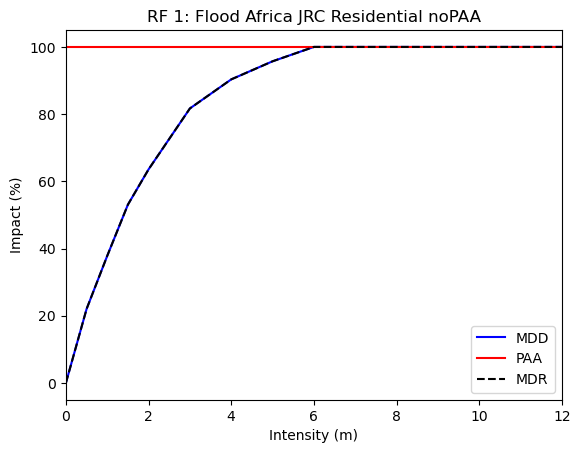

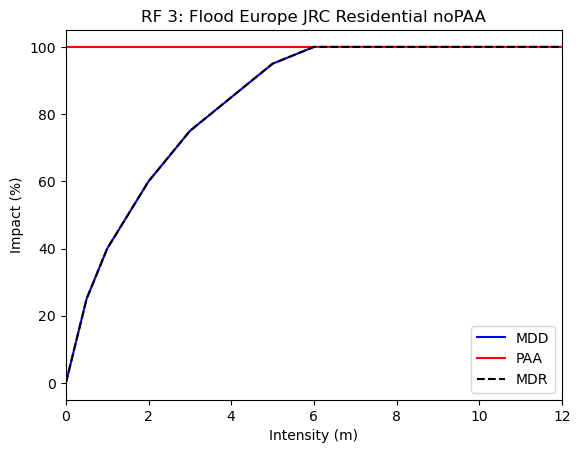

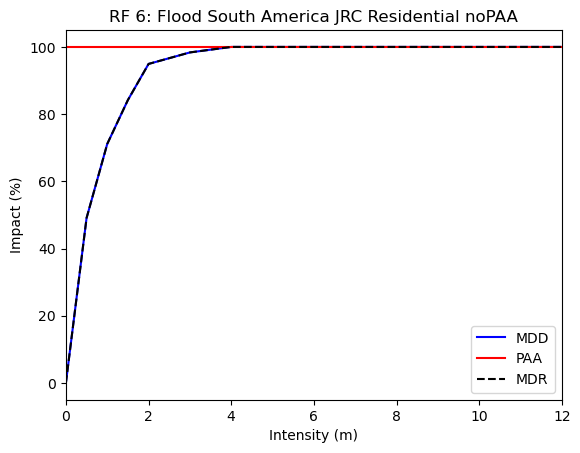

In [1]:
from climada_petals.entity.impact_funcs.river_flood import ImpfRiverFlood,flood_imp_func_set
impf_set = flood_imp_func_set()
impf_AFR = impf_set.get_func(fun_id=1)
impf_AFR[0].plot()
impf_EUR = impf_set.get_func(fun_id=3)
impf_EUR[0].plot()
impf_OCE = impf_set.get_func(fun_id=6)
impf_OCE[0].plot()

In [6]:
impf_AFR[0].intensity,impf_AFR[0].mdd,impf_AFR[0].paa

impf_AFR[0].intensity,impf_AFR[0].mdd,impf_AFR[0].paa

(array([ 0. ,  0.5,  1. ,  1.5,  2. ,  3. ,  4. ,  5. ,  6. , 12. ]),
 array([0.    , 0.2199, 0.3782, 0.5306, 0.6356, 0.8169, 0.9034, 0.9572,
        1.    , 1.    ]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [14]:
impf_AFR[0].mdd * impf_AFR[0].paa * 100

array([  0.  ,  21.99,  37.82,  53.06,  63.56,  81.69,  90.34,  95.72,
       100.  , 100.  ])

In [15]:
mdd=[0., 0.2199, 0.3782, 0.5306, 0.6356, 0.8169, 0.9034, 0.9572, 1., 1.]
paa=[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]

In [19]:
import numpy as np
np.multiply(mdd,paa)*100

array([  0.  ,  21.99,  37.82,  53.06,  63.56,  81.69,  90.34,  95.72,
       100.  , 100.  ])